# OBJECTIVE


In this project, we will employ a variety of Machine Learning models, including Deep Learning techniques like Artificial Neural Networks (ANN), to evaluate their effectiveness in identifying fraudulent transactions versus legitimate payments.

The dataset provided has anonymized and scaled features to maintain privacy. Despite this, we can still conduct a thorough analysis of the dataset's key characteristics. Let’s dive in and explore!

Relying on just Accuracy score while have data imabalance and also a class of imporatance can be misleading instead we should generate a classification report and can evaluate model using fl score ,or precision/recall value.

## Importing all the dependencies

In [1]:
import pandas as pd 
import numpy as np
import keras 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
#Supress warnings

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns',None) # To display maximum number of columns.

## Reading the Data

In [3]:
data = pd.read_csv('creditcard.csv')

# Data exploration

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Our first step is to develop a fundamental understanding of our data. It's important to note that, aside from the transaction details and amount, the identities of the other columns remain undisclosed for privacy reasons. However, we do know that these anonymized columns have already been scaled. Let's begin our exploration

## Checking for Null Values

In [5]:
total = data.isnull().sum().sort_values(ascending=False)
percent= (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(10)

,Total,Percent
Time,0,0.0
V16,0,0.0
Amount,0,0.0
V28,0,0.0
V27,0,0.0
V26,0,0.0
V25,0,0.0
V24,0,0.0
V23,0,0.0
V22,0,0.0


There are no "Null" values, so we don't have to work on ways to replace values.

In [6]:
data.describe()  ## Descriptive Statistics

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [8]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
real = round(data['Class'].value_counts()[0]/len(data) * 100, 2)

fraud = round(data['Class'].value_counts()[1]/len(data) * 100, 2)

print('Real Transaction : {} % of the dataset'.format(real))
print('Fraud Transaction : {} % of the dataset'.format(fraud))

Real Transaction : 99.83 % of the dataset
Fraud Transaction : 0.17 % of the dataset


Observe the significant imbalance in our original dataset: the majority of transactions are legitimate, with only a small fraction being fraudulent. If we use this dataset as-is for our predictive models and analysis, we risk introducing numerous errors and overfitting. This happens because the algorithms might "assume" that most transactions are not fraudulent. However, our goal is not for the model to make assumptions but to identify patterns indicative of fraud.

Text(0.5, 1.0, 'Class Distribution \n (0 : Real || 1 : Fraud)')

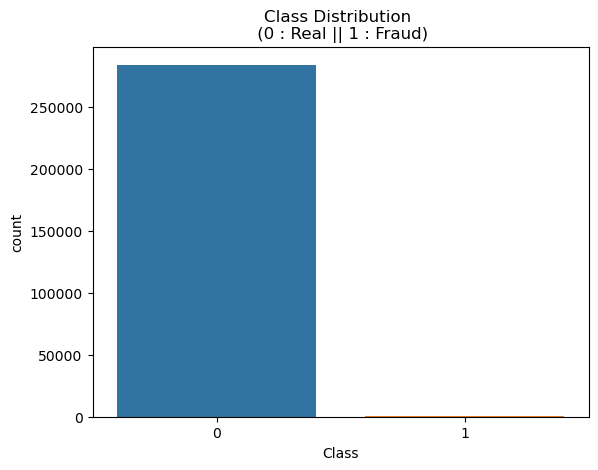

In [10]:
sns.countplot(x='Class', data=data)
plt.title('Class Distribution \n (0 : Real || 1 : Fraud)')

By seeing the distributions we can have an idea how skewed are these features

<Axes: >

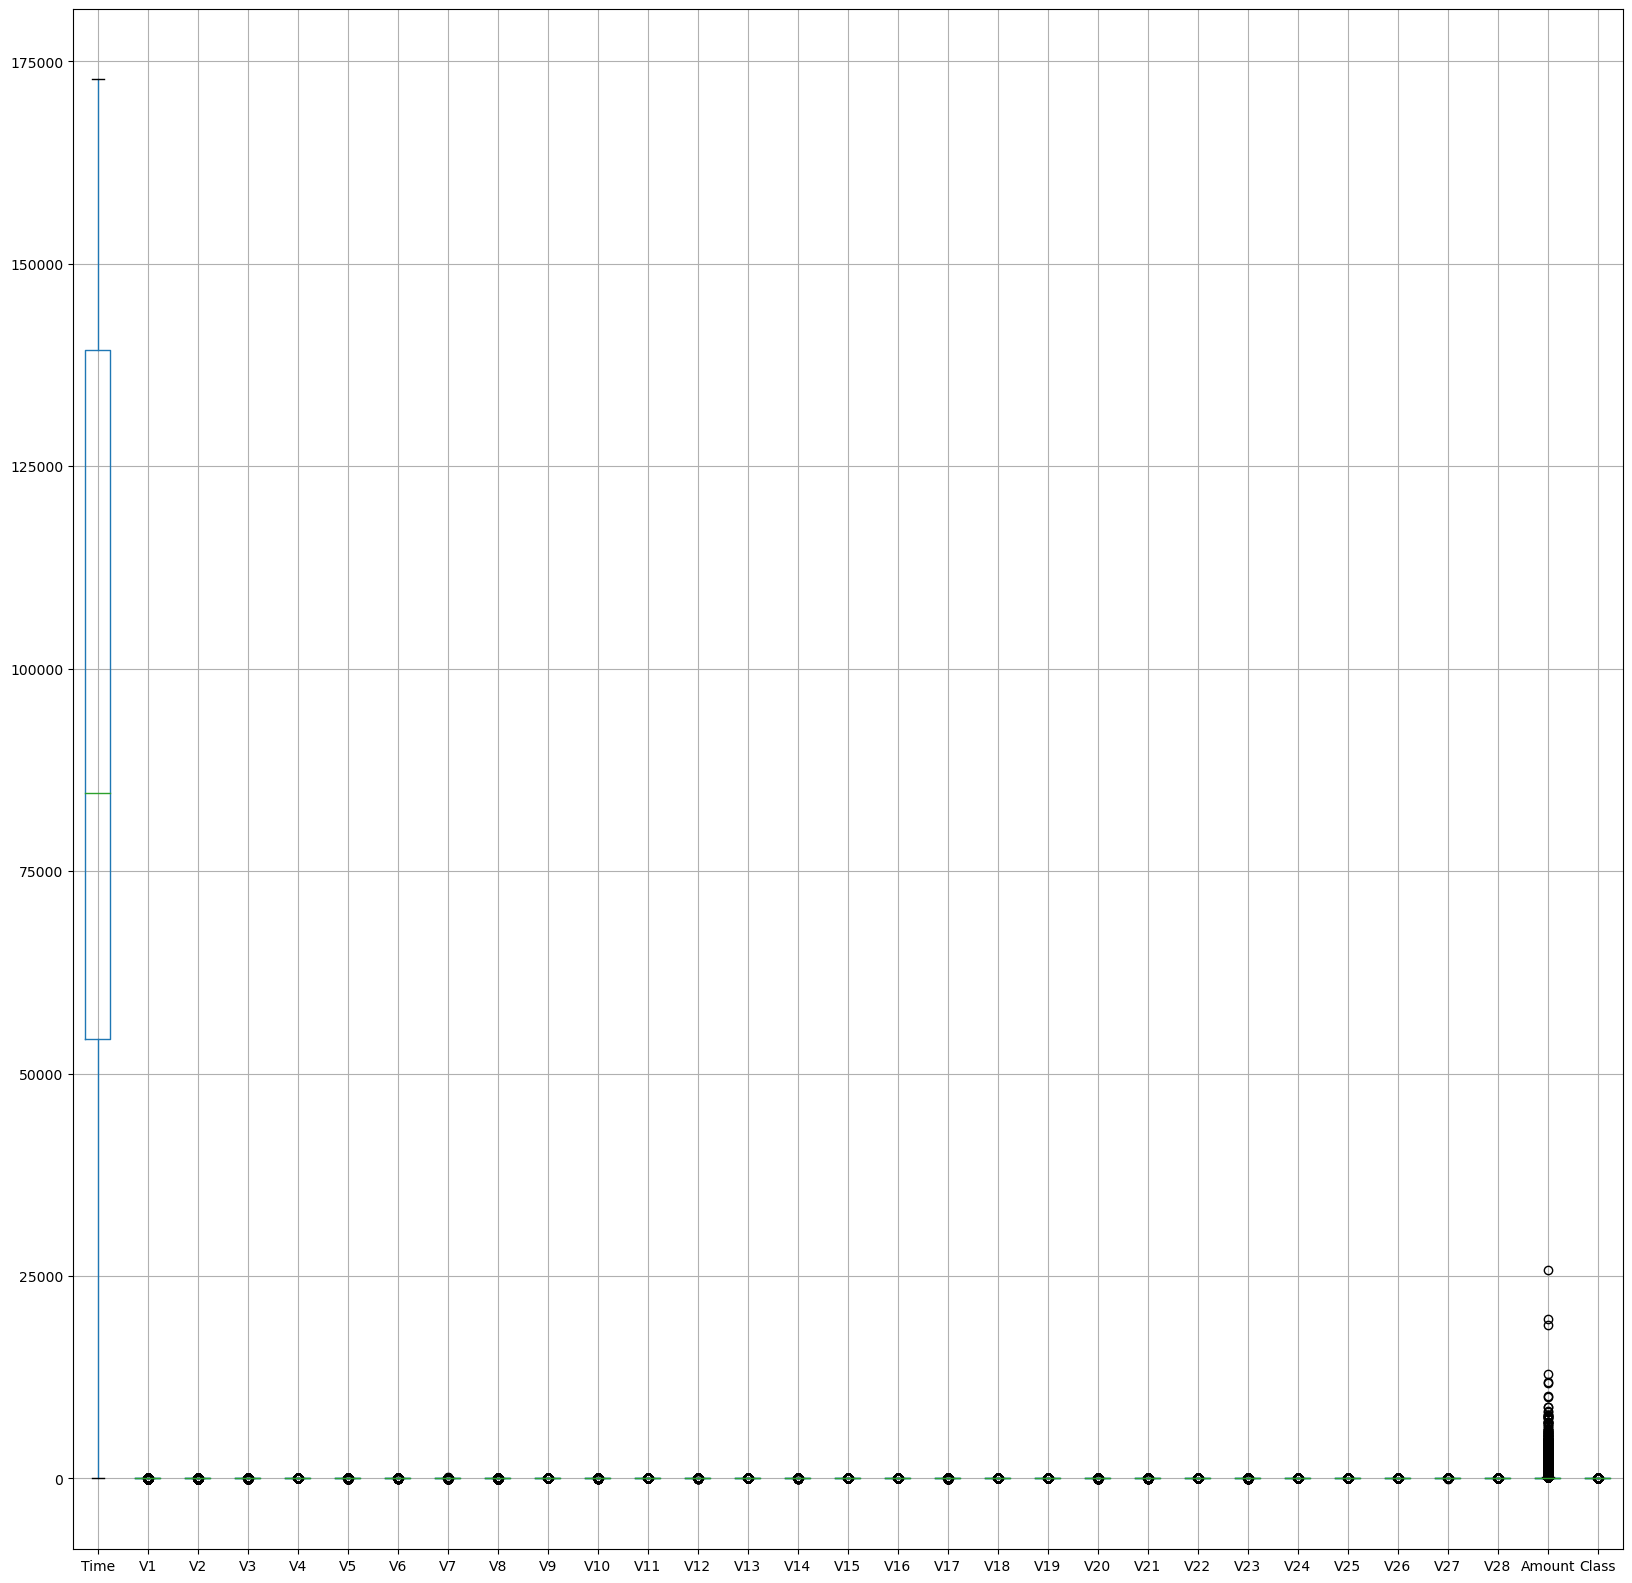

In [13]:
data.boxplot(figsize=(20,20))

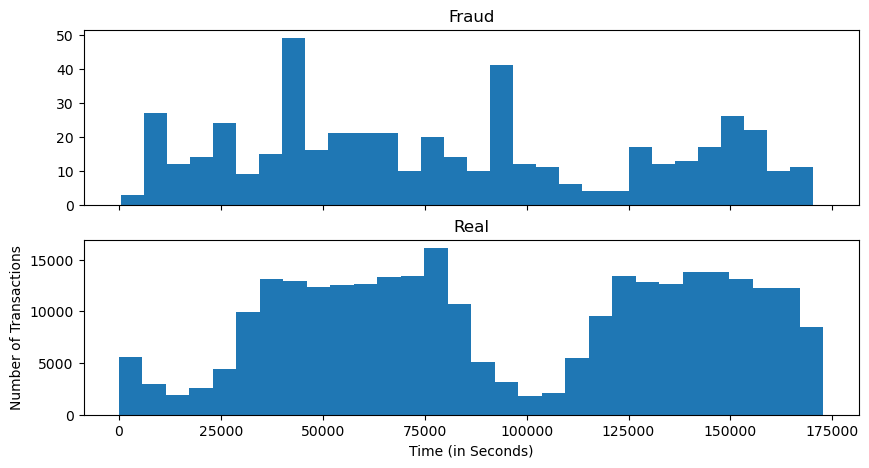

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,5))

bins = 30

ax1.hist(data.Time[data.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data.Time[data.Class == 0], bins = bins)
ax2.set_title('Real')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

The 'Time' feature looks pretty similar across both types of transactions. You could argue that fraudulent transactions are more uniformly distributed, while normal transactions have a cyclical distribution. This could make it easier to detect a fraudulent transaction during at an 'off-peak' time.

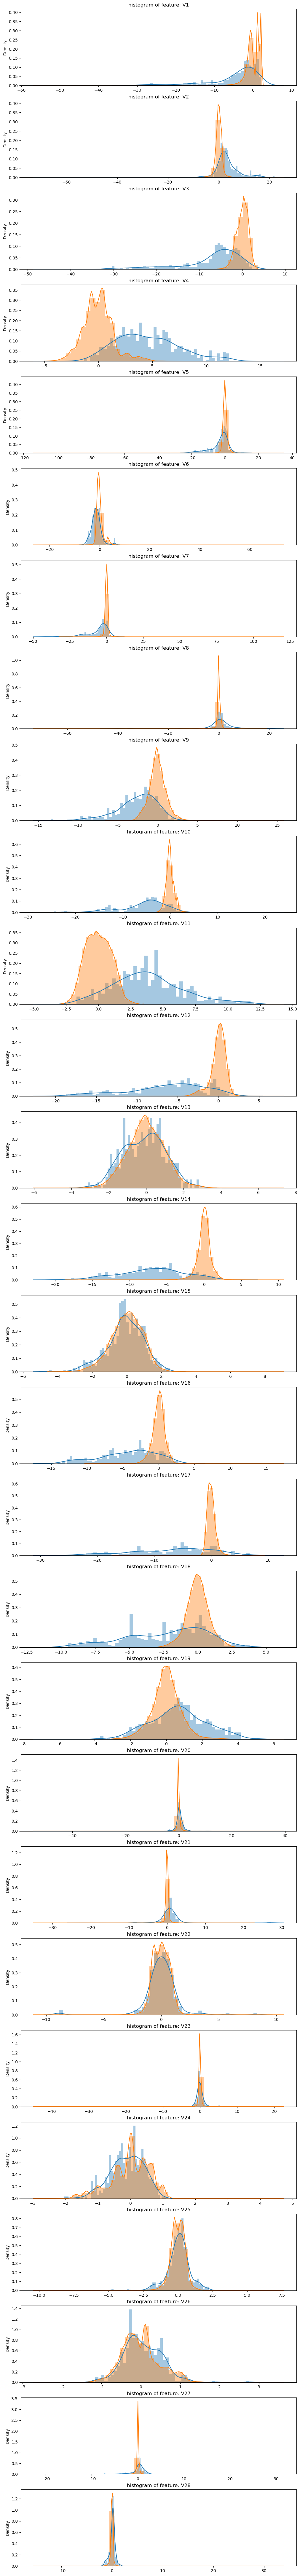

In [17]:
v_features = data.iloc[:,1:29].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(data[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[cn][data.Class == 1], bins=50)
    sns.distplot(data[cn][data.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

# Pre-processing

Normalize the amount variable to ensure it is on the same scale as the other variables.

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data['Amount_Normalize'] = sc.fit_transform(data['Amount'].values.reshape(-1,1))

In [19]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_Normalize
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


drop the orignal Amount column and Time because we are not using those column anymore.

In [20]:
data=data.drop(['Amount'],axis=1)
data=data.drop(['Time'],axis=1)

In [21]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Normalize
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


## Creating X and Y

In [22]:
x = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [23]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


## Splitting the data into training and testing sets

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.3, random_state=0)

In [31]:
x_train.shape

(199364, 29)

In [32]:
x_test.shape

(85443, 29)

In [33]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Deep Neural network

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

## ANN Architechture

In [35]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(units=20,activation='relu'),
    Dense(units=20,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 16)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 24)                  │             408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 20)                  │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,829 (7.14 KB)

 Trainable params: 1,829 (7.14 KB)

 Non-trainable params: 0 (0.00 B)

## Training

In [37]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.9988 - loss: 0.0183
Epoch 2/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.9994 - loss: 0.0038
Epoch 3/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.9993 - loss: 0.0044
Epoch 4/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.9993 - loss: 0.0039
Epoch 5/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.9994 - loss: 0.0033


## Evaluating the Model

In [38]:
score = model.evaluate(x_test,y_test)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9993 - loss: 0.0032


In [39]:
print(score)

[0.003261866979300976, 0.9993914365768433]


In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools


def plot_confusion_metrix(cm,classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    """this function prints and plot the confusion matirx
    Normalization can be applied by setting 'normalize=True'
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, Without Normalisation")
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=35)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [41]:
y_pred = model.predict(x_test)
y_test = pd.DataFrame(y_test)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


In [42]:
conf_matrix = confusion_matrix(y_test, y_pred.round())

In [43]:
print(conf_matrix)

[[85277    19]
 [   33   114]]


Confusion Matrix, Without Normalisation
[[85277    19]
 [   33   114]]


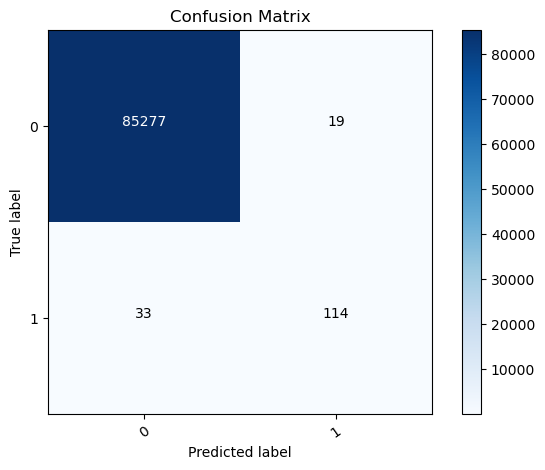

In [44]:
plot_confusion_metrix(conf_matrix, classes=[0,1])

Let's plot same confusion matix for entire data set

In [45]:
y_pred = model.predict(x)
y_expected = pd.DataFrame(y)

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


Confusion Matrix, Without Normalisation
[[284257     58]
 [    95    397]]


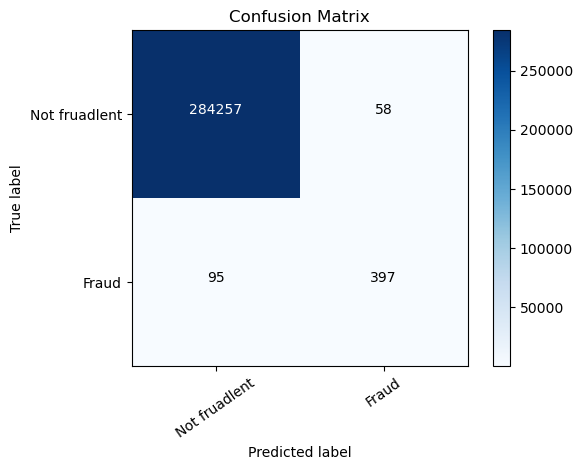

In [46]:
conf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_metrix(conf_matrix,classes=['Not fruadlent','Fraud'])
plt.show()

## Decision Tree

In [47]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [48]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)


Confusion Matrix, Without Normalisation
[[85268    28]
 [   39   108]]


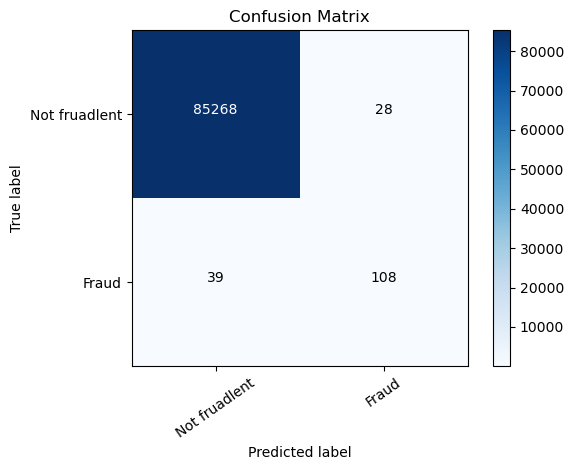

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.79      0.73      0.76       147

    accuracy                           1.00     85443
   macro avg       0.90      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy of the model: 0.9992158515033414


In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(y_test, y_pred.round())
plot_confusion_metrix(conf_matrix,classes=['Not fruadlent','Fraud'])
plt.show()

print('Classification report')

print(classification_report(y_test,y_pred))

acc= accuracy_score(y_test,y_pred)
print("Accuracy of the model:", acc)

## Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [52]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

Confusion Matrix, Without Normalisation
[[85289     7]
 [   34   113]]


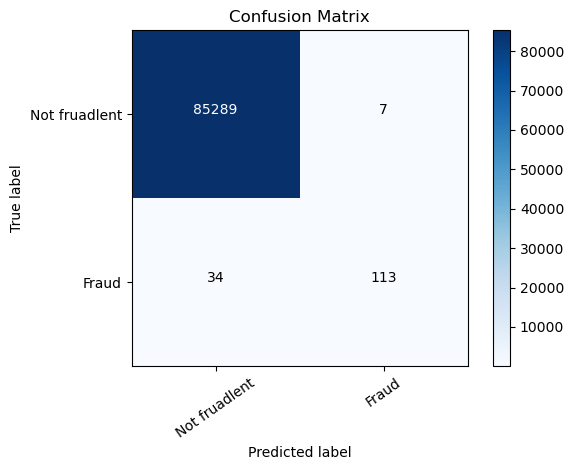

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.77      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy of the model: 0.9995201479348805


In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(y_test, y_pred.round())
plot_confusion_metrix(conf_matrix,classes=['Not fruadlent','Fraud'])
plt.show()

print('Classification report')

print(classification_report(y_test,y_pred))

acc= accuracy_score(y_test,y_pred)
print("Accuracy of the model:", acc)

In [41]:
%%bash

pip install -u imbalanced-learn


Couldn't find program: 'bash'


## SMOTE(Synthetic Minority Oversampling Technique)

In [54]:
from imblearn.over_sampling import SMOTE  # To handle Imbalanced data

In [55]:
x_resample, y_resample = SMOTE().fit_resample(x,y)

In [56]:
x_resample = pd.DataFrame(x_resample)
y_resample = pd.DataFrame(y_resample)

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size=0.3,random_state=0)

In [58]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [59]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
26537/26537 ━━━━━━━━━━━━━━━━━━━━ 63s 2ms/step - accuracy: 0.9798 - loss: 0.0571
Epoch 2/5
26537/26537 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - accuracy: 0.9964 - loss: 0.0129
Epoch 3/5
26537/26537 ━━━━━━━━━━━━━━━━━━━━ 83s 2ms/step - accuracy: 0.9971 - loss: 0.0110
Epoch 4/5
26537/26537 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - accuracy: 0.9977 - loss: 0.0093
Epoch 5/5
26537/26537 ━━━━━━━━━━━━━━━━━━━━ 61s 2ms/step - accuracy: 0.9979 - loss: 0.0087


5331/5331 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
Confusion Matrix, Without Normalisation
[[84907   265]
 [   50 85367]]


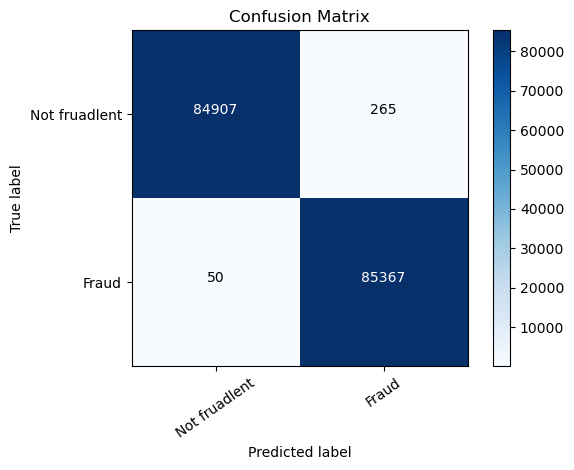

In [60]:
y_pred = model.predict(x_test)
y_expected = pd.DataFrame(y_test)
conf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_metrix(conf_matrix,classes=['Not fruadlent','Fraud'])
plt.show()

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step
Confusion Matrix, Without Normalisation
[[283578    737]
 [     3    489]]


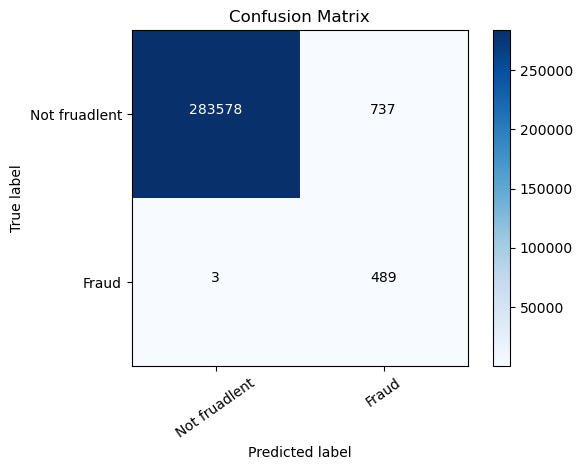

In [61]:
y_pred = model.predict(x)
y_expected = pd.DataFrame(y)
conf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_metrix(conf_matrix,classes=['Not fruadlent','Fraud'])
plt.show()